In [1]:
import pandas as pd
import numpy as np
import os

os.listdir('./data')

['TCGA_binary.csv',
 'TCGA_data.csv',
 'urine_binary.csv',
 'urine_k15_0419.csv',
 'urine_K15_0420.csv',
 'urine_k15_0423.csv',
 'urine_k15_0428.csv',
 'urine_k15_120cases.csv']

In [2]:
TCGA = pd.read_csv('./data/TCGA_data.csv')
urine = pd.read_csv('./data/urine_k15_0428.csv')

In [3]:
TCGA = TCGA[(TCGA.y == 'BLCA') | (TCGA.y == 'Normal')]
TCGA = TCGA.replace(['BLCA','Normal'],[ 1,0 ])
TCGA = TCGA.reset_index(drop = True)

In [4]:
urine = urine[(urine.y == 'BLCA') | (urine.y == 'NL')]
urine = urine.replace(['BLCA','NL'],[ 1,0 ])
urine = urine.reset_index(drop = True)

In [5]:
urine = urine.drop(['Unnamed: 0','X'], axis = 1)

In [6]:
X = TCGA.drop('y', axis = 1)
y = TCGA['y']

urine_X = urine.drop('y', axis = 1)
urine_y = urine['y']

In [7]:
urine_y.value_counts()

1    51
0    28
Name: y, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

standardsc = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()

standardsc.fit(X)
mms.fit(X)
mas.fit(X)

MaxAbsScaler(copy=True)

In [9]:
X_standard = pd.DataFrame(standardsc.transform(X), columns = X.columns)
X_mms = pd.DataFrame(mms.transform(X), columns = X.columns)
X_mas = pd.DataFrame(mas.transform(X), columns = X.columns)

urine_X_standard = standardsc.transform(urine_X)
urine_X_mms = mms.transform(urine_X)
urine_X_mas = mas.transform(urine_X)

C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

def get_eval(y_test, pred) :
    
    print('accuracy : {0:.4f} precision : {1:.4f} recall : {2:.4f} F1 : {3:.4f} AUC : {4:.4f}'.format(
                                                        accuracy_score(y_test, pred), 
                                                        precision_score(y_test, pred),
                                                        recall_score(y_test, pred),
                                                        f1_score(y_test,pred),
                                                        roc_auc_score(y_test, pred)
                                                                      ))
    
    
    
    #print('accuracy : {0:.4f}'.format(accuracy_score(y_test,pred)), 'roc_auc_score : ', roc_auc_score(y_test,pred))
    #print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

In [11]:
def roc_curve_plot(y_test, pred_proba_c1) :
    
    fpr, tpr, threshold = roc_curve(y_test, pred_proba_c1)
    
    #ROC curve
    plt.plot(fpr, tpr, label = 'ROC')
    #대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    plt.xlabel('1-Specifity')
    plt.ylabel('Sensitivity')
    
    plt.legend()


In [12]:
import matplotlib.pyplot as plt

# logistic regression
- maxabs

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
import warnings
warnings.filterwarnings('ignore')

In [13]:
lr.fit(X_mas, y)
get_eval(urine_y, lr.predict(urine_X_mas))

accuracy : 0.5063 precision : 0.8750 recall : 0.2745 F1 : 0.4179 AUC : 0.6015
[[26  2]
 [37 14]]


sample 10 thresholds :  [2.   1.   0.03 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.  ]
sample FPR(1-specifity) :  [0.    0.071 0.107 0.179 0.286 0.5   0.536 0.679 0.786 0.857 0.929]
sample TPR(sensitivity) :  [0.    0.098 0.392 0.431 0.49  0.51  0.549 0.569 0.608 0.667 0.882]


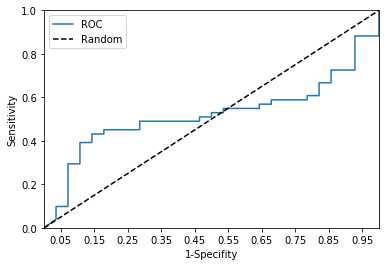

In [17]:
pred_proba = lr.predict_proba(urine_X_mas)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

thr_index = np.arange(0, threshold.shape[0], 3)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR(1-specifity) : ', np.round(fpr[thr_index],3))
print('sample TPR(sensitivity) : ', np.round(tpr[thr_index],3))

In [22]:
def roc_info_print(fpr, tpr) :
    
    mysum = 1 - fpr + tpr
    max_sum_ind = np.argmax(mysum)
    
    print('max sum : ', np.max(mysum))
    print('specifity : ', 1 - fpr[max_sum_ind])
    print('sensitivity : ', tpr[max_sum_ind])

In [20]:
roc_info_print(fpr, tpr)

max sum :  1.288515406162465
specifity :  0.8571428571428572
sensitivity :  0.43137254901960786


# random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state = 0)

In [31]:
rf.fit(X, y)
get_eval(urine_y, rf.predict(urine_X))

accuracy : 0.6709 precision : 0.6712 recall : 0.9608 F1 : 0.7903 AUC : 0.5518
[[ 4 24]
 [ 2 49]]


sample 10 thresholds :  [1.95 0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35
 0.25]
sample FPR :  [0.    0.036 0.107 0.143 0.179 0.321 0.429 0.571 0.75  0.786 0.821 0.857
 0.893 0.964 1.   ]
sample TPR :  [0.    0.059 0.118 0.196 0.431 0.588 0.667 0.745 0.784 0.882 0.941 0.98
 0.98  1.    1.   ]


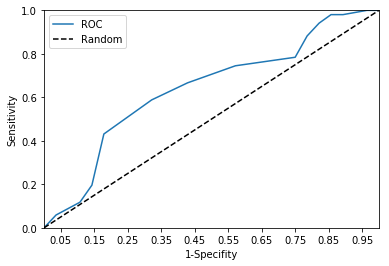

In [32]:
pred_proba = rf.predict_proba(urine_X_mas)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 1)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

In [33]:
roc_info_print(fpr, tpr)

max sum :  1.2668067226890756
specifity :  0.6785714285714286
sensitivity :  0.5882352941176471


# SVM

In [34]:
from sklearn.svm import SVC
svm = SVC(probability=True)

In [35]:
svm.fit(X, y)
get_eval(urine_y, svm.predict(urine_X))

accuracy : 0.6203 precision : 0.8182 recall : 0.5294 F1 : 0.6429 AUC : 0.6576
[[22  6]
 [24 27]]


sample 10 thresholds :  [2.   0.96 0.28 0.09 0.07 0.06 0.02 0.01 0.01 0.01 0.01 0.01 0.  ]
sample FPR :  [0.    0.214 0.25  0.286 0.321 0.393 0.429 0.536 0.571 0.857 0.893 0.929
 1.   ]
sample TPR :  [0.    0.569 0.608 0.725 0.745 0.765 0.804 0.843 0.882 0.902 0.922 0.961
 1.   ]


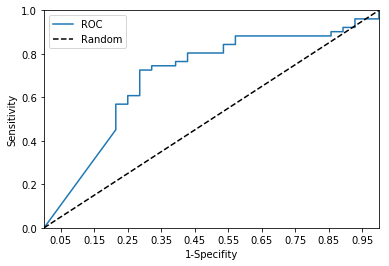

In [39]:
pred_proba = svm.predict_proba(urine_X_mas)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 2)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

In [40]:
roc_info_print(fpr, tpr)

max sum :  1.4397759103641457
specifity :  0.7142857142857143
sensitivity :  0.7254901960784313


# adaboost
- maxabs

In [15]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [19]:
ada.fit(X_mas, y)
get_eval(urine_y, ada.predict(urine_X_mas))

accuracy : 0.6962 precision : 0.8293 recall : 0.6667 F1 : 0.7391 AUC : 0.7083
[[21  7]
 [17 34]]


sample 10 thresholds :  [1.73 0.63 0.51 0.5  0.5  0.5  0.49 0.48 0.47 0.46 0.45 0.44]
sample FPR :  [0.    0.036 0.071 0.143 0.25  0.286 0.464 0.536 0.643 0.679 0.893 0.929]
sample TPR :  [0.    0.137 0.529 0.608 0.647 0.686 0.706 0.824 0.843 0.902 0.922 0.98 ]


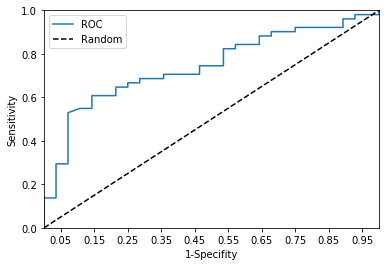

In [20]:
pred_proba = ada.predict_proba(urine_X_mas)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 3)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

In [24]:
roc_info_print(fpr, tpr)

max sum :  1.4649859943977592
specifity :  0.8571428571428572
sensitivity :  0.6078431372549019


# GBM

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [48]:
gb.fit(X, y)
get_eval(urine_y, gb.predict(urine_X))

accuracy : 0.6709 precision : 0.6812 recall : 0.9216 F1 : 0.7833 AUC : 0.5679
[[ 6 22]
 [ 4 47]]


sample 10 thresholds :  [2.   0.98 0.95 0.85 0.75 0.65 0.39 0.06]
sample FPR :  [0.    0.143 0.214 0.429 0.5   0.714 0.786 0.929]
sample TPR :  [0.    0.216 0.49  0.627 0.725 0.804 0.922 0.961]


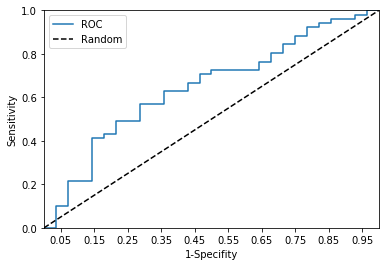

In [49]:
pred_proba = gb.predict_proba(urine_X_mas)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 5)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

In [51]:
roc_info_print(fpr, tpr)

max sum :  1.2829131652661063
specifity :  0.7142857142857143
sensitivity :  0.5686274509803921


# xgboost

In [13]:
from xgboost import XGBClassifier
params = {'colsample_bytree': 0.3,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 200}

xgb = XGBClassifier(params = params)

In [14]:
xgb.fit(X.as_matrix(), y)

C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       params={'colsample_bytree': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [54]:
get_eval(urine_y, xgb.predict(urine_X.as_matrix()))

accuracy : 0.6456 precision : 0.6716 recall : 0.8824 F1 : 0.7627 AUC : 0.5483
[[ 6 22]
 [ 6 45]]


In [15]:
def roc_curve_plot(y_test, pred_proba_c1) :
    
    fpr, tpr, threshold = roc_curve(y_test, pred_proba_c1)
    
    #ROC curve
    plt.plot(fpr, tpr, label = 'ROC')
    #대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    plt.xlabel('1-Specifity', fontsize = 16)
    plt.ylabel('Sensitivity',fontsize = 16)
    
    plt.legend(prop={'size': 15})

C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


sample 10 thresholds :  [1.99 0.98 0.98 0.97 0.94 0.92 0.84 0.78 0.7  0.65 0.48]
sample FPR :  [0.    0.071 0.179 0.25  0.321 0.357 0.5   0.536 0.607 0.643 0.821]
sample TPR :  [0.    0.137 0.157 0.255 0.412 0.51  0.686 0.784 0.843 0.882 0.902]


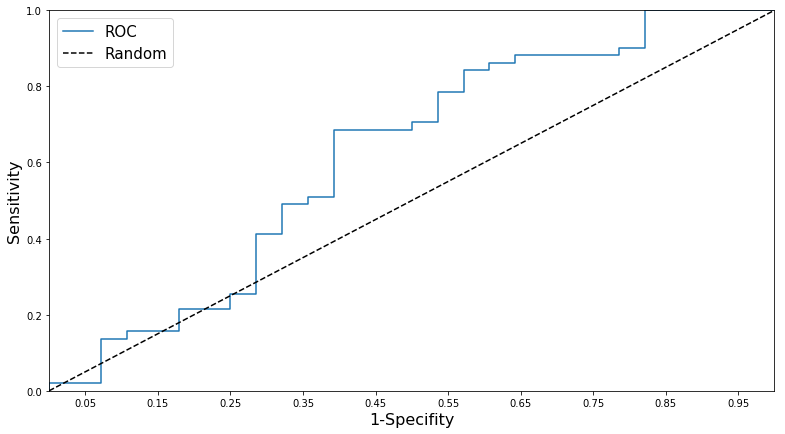

In [18]:
pred_proba = xgb.predict_proba(urine_X.as_matrix())[:,1]
plt.figure(figsize = (13,7))
roc_curve_plot(urine_y, pred_proba)
plt.savefig("./xgb_roc.png",dpi=300)
fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 3)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

In [58]:
roc_info_print(fpr, tpr)

max sum :  1.2934173669467788
specifity :  0.6071428571428572
sensitivity :  0.6862745098039216


# lighGBM

In [63]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()

In [64]:
lgb.fit(X_standard, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [66]:
get_eval(urine_y, lgb.predict(urine_X_standard))

accuracy : 0.6962 precision : 0.6800 recall : 1.0000 F1 : 0.8095 AUC : 0.5714
[[ 4 24]
 [ 0 51]]


sample 10 thresholds :  [2.   1.   1.   1.   1.   1.   0.99 0.99 0.97 0.71 0.59 0.01]
sample FPR :  [0.    0.071 0.107 0.179 0.25  0.321 0.393 0.536 0.643 0.75  0.786 1.   ]
sample TPR :  [0.    0.157 0.255 0.412 0.51  0.549 0.686 0.706 0.765 0.902 0.98  1.   ]


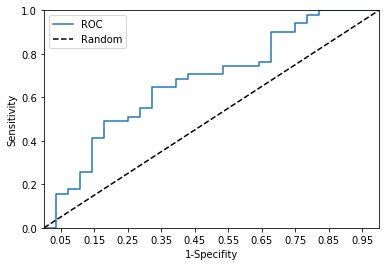

In [68]:
pred_proba = lgb.predict_proba(urine_X_standard)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 3)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

In [70]:
roc_info_print(fpr, tpr)

max sum :  1.3256302521008405
specifity :  0.6785714285714286
sensitivity :  0.6470588235294118
